2018-03-14 17:02:32 MainProcess:INFO:root:Created Konrad object:
RCE(
    atmosphere=<xarray.Atmosphere>
Dimensions:  (phlev: 201, plev: 200, time: 1)
Coordinates:
  * plev     (plev) float64 1.013e+05 9.898e+04 9.672e+04 9.45e+04 9.234e+04 ...
  * time     (time) int64 0
  * phlev    (phlev) float64 1.025e+05 1.001e+05 9.785e+04 9.561e+04 ...
Data variables:
    T        (time, plev) float64 299.7 298.4 297.2 296.0 294.8 293.6 292.3 ...
    H2O      (time, plev) float64 0.02595 0.02458 0.02324 0.02193 0.02065 ...
    N2O      (time, plev) float64 3.06e-07 3.06e-07 3.06e-07 3.06e-07 ...
    O3       (time, plev) float64 2.027e-42 1.533e-41 1.107e-40 7.63e-40 ...
    CO2      (time, plev) float64 0.000348 0.000348 0.000348 0.000348 ...
    CO       (time, plev) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    CH4      (time, plev) float64 1.65e-06 1.65e-06 1.65e-06 1.65e-06 ...
    z        (time, plev) float64 95.39 298.1 499.9 700.9 901.1 1.101e+03 ...
Attributes:
    convectio

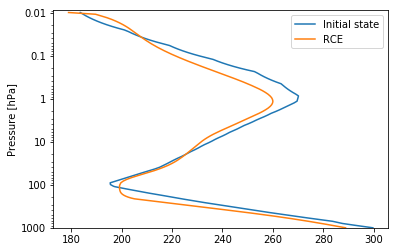

In [1]:
%matplotlib inline
import konrad
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from typhon.plots import profile_p_log

# Load a standard atmosphere.
atmosphere = konrad.atmosphere.Atmosphere.from_netcdf(
    ncfile='data/tropical-standard.nc',
)

# Atmosphere composition according to RCEMIP.
atmosphere.tracegases_rcemip()

fig, ax = plt.subplots()
profile_p_log(atmosphere['plev'], atmosphere['T'][-1, :], label='Initial state')

# Frame the setup for the radiative-convective equilibrium simulation.
rce = konrad.RCE(
    atmosphere,
    radiation=konrad.radiation.RRTMG(),  # Use RRTMG radiation scheme.
    timestep=0.1,  # Set timestep in days (12-hour timestep).
    max_iterations=712,  # Set maximum number of iterations (2 years).
)

rce.run()  # Start the simulation.

profile_p_log(atmosphere['plev'], atmosphere['T'][-1, :], label='RCE')
ax.legend()